<a href="https://colab.research.google.com/github/rmgithub123/be_class/blob/main/association_rule_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset (assuming you've downloaded and saved it as 'real_market_data.csv')
data = pd.read_csv('/content/market.csv')

# Display the first few rows of the dataset
print(data.head())

   Bread  Honey  Bacon  Toothpaste  Banana  Apple  Hazelnut  Cheese  Meat  \
0      1      0      1           0       1      1         1       0     0   
1      1      1      1           0       1      1         1       0     0   
2      0      1      1           1       1      1         1       1     1   
3      1      1      0           1       0      1         0       0     0   
4      0      1      0           0       0      0         0       0     0   

   Carrot  ...  Milk  Butter  ShavingFoam  Salt  Flour  HeavyCream  Egg  \
0       1  ...     0       0            0     0      0           1    1   
1       0  ...     1       1            0     0      1           0    0   
2       0  ...     1       0            1     1      1           1    1   
3       0  ...     1       0            0     0      1           0    1   
4       0  ...     0       0            0     0      0           0    0   

   Olive  Shampoo  Sugar  
0      0        0      1  
1      1        1      0  
2    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2. Data Cleaning and Pre-processing


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop missing values if necessary
data.dropna(inplace=True)

# Inspect data types and convert if necessary
print(data.dtypes)

# Convert relevant columns to appropriate data types (if needed)
# For example, if you have a 'date' column
# data['date'] = pd.to_datetime(data['date'])

Bread          0
Honey          0
Bacon          0
Toothpaste     0
Banana         0
Apple          0
Hazelnut       0
Cheese         0
Meat           0
Carrot         0
Cucumber       0
Onion          0
Milk           0
Butter         0
ShavingFoam    0
Salt           0
Flour          0
HeavyCream     0
Egg            0
Olive          0
Shampoo        0
Sugar          0
dtype: int64
Bread          int64
Honey          int64
Bacon          int64
Toothpaste     int64
Banana         int64
Apple          int64
Hazelnut       int64
Cheese         int64
Meat           int64
Carrot         int64
Cucumber       int64
Onion          int64
Milk           int64
Butter         int64
ShavingFoam    int64
Salt           int64
Flour          int64
HeavyCream     int64
Egg            int64
Olive          int64
Shampoo        int64
Sugar          int64
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,...,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.407328,0.415948,0.431034,0.383621,0.448276,0.405172,0.420259,0.443966,0.387931,0.413793,...,0.370690,0.375000,0.405172,0.398707,0.385776,0.415948,0.403017,0.381466,0.366379,0.366379
std,0.491867,0.493417,0.495755,0.486792,0.497854,0.491455,0.494133,0.497386,0.487805,0.493044,...,0.483511,0.484645,0.491455,0.490161,0.487303,0.493417,0.491034,0.486271,0.482335,0.482335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = data
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,1,0,0,1,1,0
2,0,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,0,1
3,1,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Bread        464 non-null    int64
 1   Honey        464 non-null    int64
 2   Bacon        464 non-null    int64
 3   Toothpaste   464 non-null    int64
 4   Banana       464 non-null    int64
 5   Apple        464 non-null    int64
 6   Hazelnut     464 non-null    int64
 7   Cheese       464 non-null    int64
 8   Meat         464 non-null    int64
 9   Carrot       464 non-null    int64
 10  Cucumber     464 non-null    int64
 11  Onion        464 non-null    int64
 12  Milk         464 non-null    int64
 13  Butter       464 non-null    int64
 14  ShavingFoam  464 non-null    int64
 15  Salt         464 non-null    int64
 16  Flour        464 non-null    int64
 17  HeavyCream   464 non-null    int64
 18  Egg          464 non-null    int64
 19  Olive        464 non-null    int64
 20  Shampoo   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate itemset frequency (percentage of transactions where each item was purchased)
itemset_frequency = df.mean() * 100
itemset_frequency


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bread          40.732759
Honey          41.594828
Bacon          43.103448
Toothpaste     38.362069
Banana         44.827586
Apple          40.517241
Hazelnut       42.025862
Cheese         44.396552
Meat           38.793103
Carrot         41.379310
Cucumber       38.146552
Onion          37.931034
Milk           37.068966
Butter         37.500000
ShavingFoam    40.517241
Salt           39.870690
Flour          38.577586
HeavyCream     41.594828
Egg            40.301724
Olive          38.146552
Shampoo        36.637931
Sugar          36.637931
dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


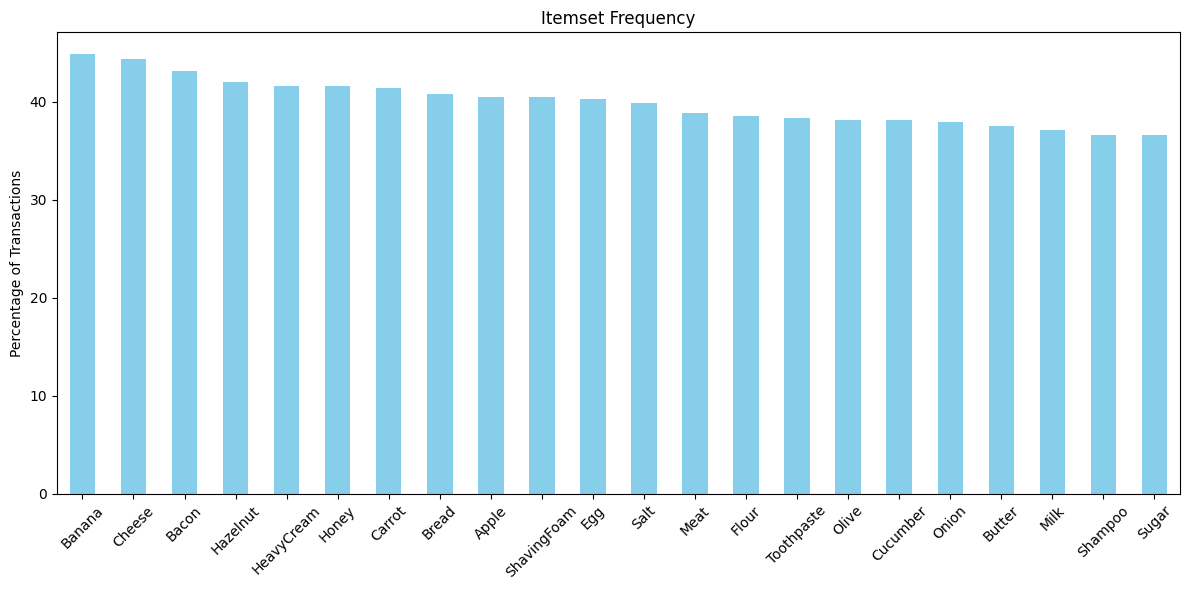

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))
itemset_frequency.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Itemset Frequency')
plt.ylabel('Percentage of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

# Calculate the size of each itemset (number of items in each transaction)
itemset_sizes = df.sum(axis=1)
itemset_sizes



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0       9
1      12
2      17
3      11
4       1
       ..
459    15
460     6
461     5
462    12
463    11
Length: 464, dtype: int64

In [ ]:
# Create a DataFrame for the histogram data
histogram_data = pd.DataFrame({'Itemset Size': itemset_sizes})

# Create an interactive histogram using Plotly Express
fig = px.histogram(histogram_data, x='Itemset Size', nbins=max(itemset_sizes) - 1, labels={'Itemset Size': 'Number of Items in Transaction'})
fig.update_layout(
    title='Itemset Size Distribution',
    xaxis_title='Number of Items in Transaction',
    yaxis_title='Frequency',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True, gridwidth=0.5, gridcolor='lightgray'),
    bargap=0.05  # Adjust the gap between bars
)

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



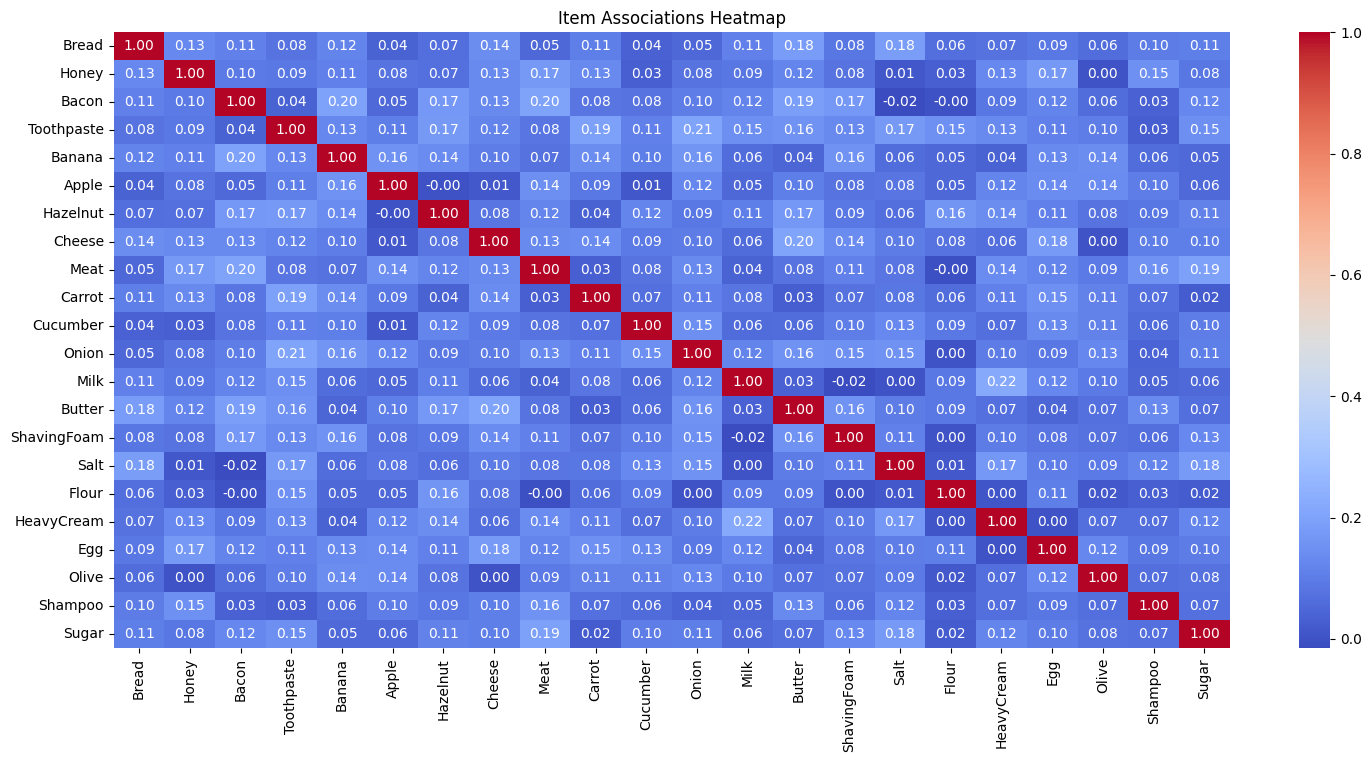

In [ ]:
# Create a correlation heatmap to visualize item associations
item_associations = df.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(item_associations, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Item Associations Heatmap')
plt.show()

In [ ]:
def biprint(text):
    bold, italic,reset= "\033[1m","\033[3m","\033[0m"
    formatted_text = f"{bold}{italic}{text}{reset}"
    print(formatted_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
frequently_bought = apriori(df, min_support=0.2, use_colnames=True, verbose=1)
biprint(f"The number of frequently purchased items is: {len(frequently_bought)}")



Processing 1014 combinations | Sampling itemset size 3
The number of frequently purchased items is: 66


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [ ]:
frequently_bought = apriori(df, min_support=0.2, use_colnames=True, verbose=1)
biprint(f"The number of frequently purchased items is: {len(frequently_bought)}")

Processing 1014 combinations | Sampling itemset size 3
The number of frequently purchased items is: 66


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [ ]:
frequently_bought

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
0,0.407328,(Bread)
1,0.415948,(Honey)
2,0.431034,(Bacon)
3,0.383621,(Toothpaste)
4,0.448276,(Banana)
...,...,...
61,0.200431,"(Cheese, HeavyCream)"
62,0.221983,"(Egg, Cheese)"
63,0.202586,"(Egg, Carrot)"
64,0.206897,"(Milk, HeavyCream)"


Rules

In [ ]:
rules = association_rules(frequently_bought, metric = "confidence", min_threshold = 0.5)
biprint(f"The number of rules = {len(rules)}")

The number of rules = 45


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Banana),0.407328,0.448276,0.211207,0.518519,1.156695,0.028612,1.145889,0.228571
1,(Bread),(Cheese),0.407328,0.443966,0.215517,0.529101,1.191760,0.034678,1.180792,0.271491
2,(Bread),(Salt),0.407328,0.398707,0.206897,0.507937,1.273960,0.044492,1.221983,0.362841
3,(Salt),(Bread),0.398707,0.407328,0.206897,0.518919,1.273960,0.044492,1.231960,0.357639
4,(Honey),(Banana),0.415948,0.448276,0.213362,0.512953,1.144281,0.026902,1.132795,0.215886
5,(Honey),(Cheese),0.415948,0.443966,0.217672,0.523316,1.178731,0.033006,1.166464,0.259618
6,(Meat),(Honey),0.387931,0.415948,0.202586,0.522222,1.255498,0.041227,1.222434,0.332484
7,(Egg),(Honey),0.403017,0.415948,0.209052,0.518717,1.247070,0.041417,1.213530,0.331869
8,(Honey),(Egg),0.415948,0.403017,0.209052,0.502591,1.247070,0.041417,1.200184,0.339217
9,(Banana),(Bacon),0.448276,0.431034,0.241379,0.538462,1.249231,0.048157,1.232759,0.361607


In [ ]:
lift = association_rules(frequently_bought, metric = "lift", min_threshold = 1.3)
biprint(f"The number of rules acc. to lift = {len(rules)}")

The number of rules acc. to lift = 45


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Banana),0.407328,0.448276,0.211207,0.518519,1.156695,0.028612,1.145889,0.228571
1,(Bread),(Cheese),0.407328,0.443966,0.215517,0.529101,1.191760,0.034678,1.180792,0.271491
2,(Bread),(Salt),0.407328,0.398707,0.206897,0.507937,1.273960,0.044492,1.221983,0.362841
3,(Salt),(Bread),0.398707,0.407328,0.206897,0.518919,1.273960,0.044492,1.231960,0.357639
4,(Honey),(Banana),0.415948,0.448276,0.213362,0.512953,1.144281,0.026902,1.132795,0.215886
5,(Honey),(Cheese),0.415948,0.443966,0.217672,0.523316,1.178731,0.033006,1.166464,0.259618
6,(Meat),(Honey),0.387931,0.415948,0.202586,0.522222,1.255498,0.041227,1.222434,0.332484
7,(Egg),(Honey),0.403017,0.415948,0.209052,0.518717,1.247070,0.041417,1.213530,0.331869
8,(Honey),(Egg),0.415948,0.403017,0.209052,0.502591,1.247070,0.041417,1.200184,0.339217
9,(Banana),(Bacon),0.448276,0.431034,0.241379,0.538462,1.249231,0.048157,1.232759,0.361607


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



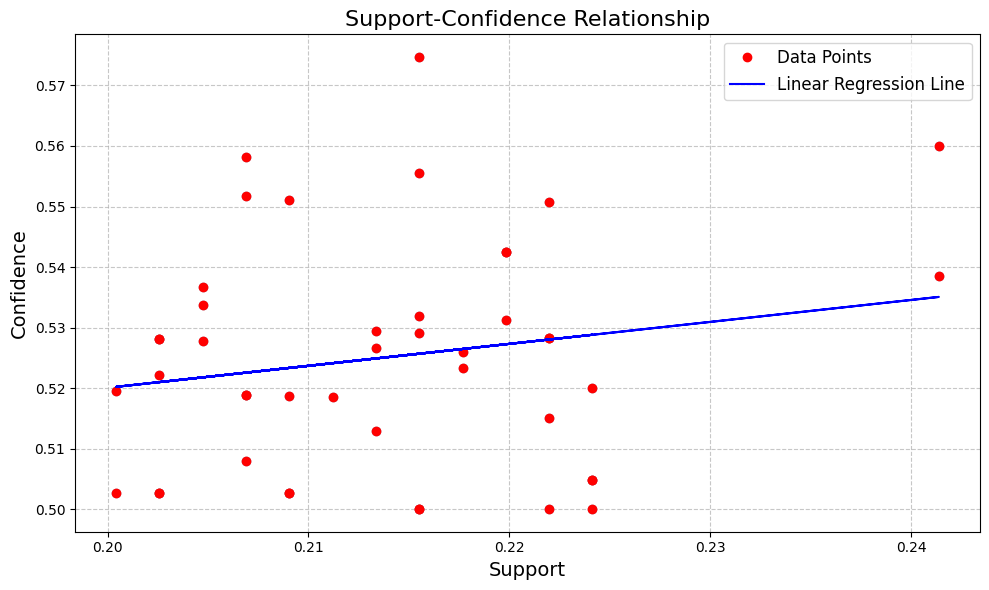

In [ ]:
fit = np.polyfit(rules["support"], rules["confidence"], 1)
fit_fn = np.poly1d(fit)

plt.figure(figsize=(10, 6))
plt.plot(rules["support"], rules["confidence"], "ro", label="Data Points")
plt.plot(rules["support"], fit_fn(rules["support"]), 'b-', label="Linear Regression Line")
plt.scatter(rules["support"], rules["confidence"], alpha=0.5)

plt.xlabel("Support", fontsize=14)
plt.ylabel("Confidence", fontsize=14)
plt.title("Support-Confidence Relationship", fontsize=16)
plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



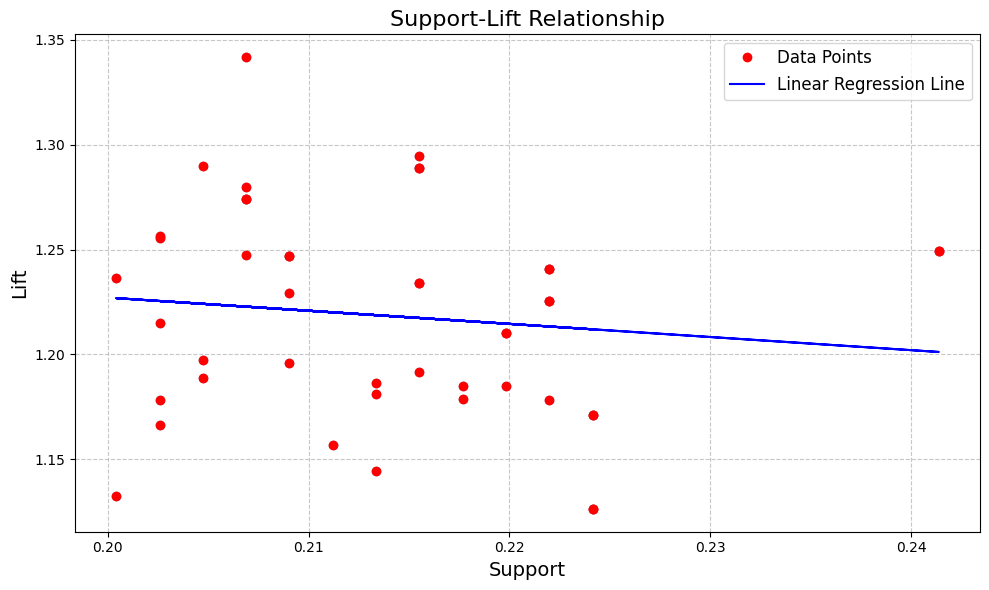

In [ ]:
fit = np.polyfit(rules["support"], rules["lift"], 1)
fit_fn = np.poly1d(fit)

plt.figure(figsize=(10, 6))
plt.plot(rules["support"], rules["lift"], "ro", label="Data Points")
plt.plot(rules["support"], fit_fn(rules["support"]), 'b-', label="Linear Regression Line")
plt.scatter(rules["support"], rules["lift"], alpha=0.5)

plt.xlabel("Support", fontsize=14)
plt.ylabel("Lift", fontsize=14)
plt.title("Support-Lift Relationship", fontsize=16)
plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



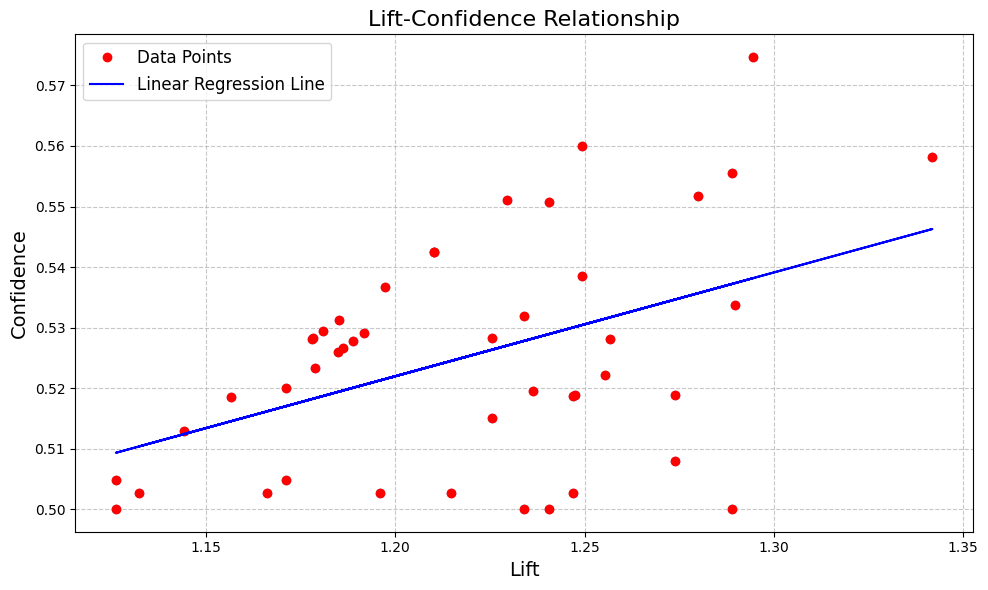

In [ ]:
fit = np.polyfit(rules["lift"], rules["confidence"], 1)
fit_fn = np.poly1d(fit)

plt.figure(figsize=(10, 6))
plt.plot(rules["lift"], rules["confidence"], "ro", label="Data Points")
plt.plot(rules["lift"], fit_fn(rules["lift"]), 'b-', label="Linear Regression Line")
plt.scatter(rules["lift"], rules["confidence"], alpha=0.5)

plt.xlabel("Lift", fontsize=14)
plt.ylabel("Confidence", fontsize=14)
plt.title("Lift-Confidence Relationship", fontsize=16)
plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

